In [8]:

%install_ext https://raw.githubusercontent.com/meduz/ipython_magics/master/tikzmagic.py
%load_ext tikzmagic

Installed tikzmagic.py. To use it, type:
  %load_ext tikzmagic
The tikzmagic extension is already loaded. To reload it, use:
  %reload_ext tikzmagic


## ACM30200: Foundations of Fluid Dynamics

Thursday 31 March at 09:00 in room H2.32 O'Brien Center for Science.  
Duration: 50 minutes


### Storm Surge Simulations and the Shallow Water Equations (SWE)

In this lecture I will introduce the shallow water approximation and explain its basic features and assumptions. 
I will show how they can be used to model storm surges and will conclude with a brief overview on how to numerically solve them.

#### Starting Point: Navier Stokes Equation
Navier Stokes Equations (NSE) are derived from conservation laws for mass and momentum.  
Therefore, let's consider the **mass balance** over a control volume $\Omega$:

$$
    \frac{d}{dt} \int_{\Omega} \rho dV = - \int_{\partial\Omega}(\rho \textbf{v})\cdot \textbf{n} dS,
$$

i.e. the time rate of change of the total mass equals the flux over the element boundaries.  
Here, $\rho$ is the densitv of the fluid, $\textbf{v}=(u,v,w)^{\top}$ a three-dimensional velocity vector and $\textbf{n}$ the outward pointing normal on $\partial \Omega$.

Now, applying Gauss theorem, yields

$$
    \frac{d}{dt} \int_{\Omega} \rho dV = - \int_{\Omega}\nabla \cdot (\rho \textbf{v})dV.
$$

If we assume that $\rho$ is smooth, we can interchange the time derivative and the integral and obtain:

$$
    \int_{\Omega} \left(\frac{d\rho}{dt}   + \nabla \cdot (\rho \textbf{v}) \right)dV = 0
$$

Since the control volume $\Omega$ is arbitrary, we have 

$$
    \frac{d\rho}{dt}   + \nabla \cdot (\rho \textbf{v}) = 0.
$$

Now, let's consider the **momentum balance** in a similar fashion.

$$
    \underbrace{\frac{d}{dt} \int_{\Omega} (\rho \textbf{v})\ dV}_{\mbox{time rate of change of momentum}} = -     \underbrace{\int_{\partial\Omega} (\rho \textbf{v}) \textbf{v}\cdot \textbf{n} dS}_{\mbox{momentum flux across boundaries}}
    + \underbrace{\int_{\Omega} \rho \textbf{b}\ dV}_{\mbox{body forces}} + \underbrace{\int_{\partial\Omega} \textbf{T} \textbf{n} dS}_{\mbox{external contact forces}}.
$$

Applying Gauss theorem, we have

$$
    \frac{d}{dt} \int_{\Omega} (\rho \textbf{v})\ dV + \int_{\Omega} \nabla \cdot (\rho \textbf{v} \textbf{v})dV
    - \int_{\Omega} \rho \textbf{b}\ dV - \int_{\Omega} \nabla \cdot \textbf{T} dV = 0.
$$

Again, if $(\rho\textbf{v})$ is smooth, we obtain

$$
    \int_{\Omega}\left( \frac{d(\rho \textbf{v})}{dt}  + \nabla \cdot (\rho \textbf{v} \textbf{v})
    - \rho \textbf{b}\  - \nabla \cdot \textbf{T}\right) dV = 0.
$$

Since $\Omega$ is arbitrary, the momentum equation reads

$$
    \frac{d(\rho \textbf{v})}{dt}  + \nabla \cdot (\rho \textbf{v} \textbf{v})
    - \rho \textbf{b}\  - \nabla \cdot \textbf{T} = 0.
$$

These equations describe the general motion of fluids.

##### From Navier Stokes to Shallow Water

There are a few assumptions that need to be made, e.g. about the fluid, density $\rho$, body forces $\textbf{b}$, and the stresses $\textbf{T}$.

1. Incompressiblity, i.e. $\rho$ does not depend on the pressure $p$.
2. Constant salinity and temperature throughout the domain $\Omega$, i.e. we assume $\rho$ is constant over time.
3. Sea water is a Newtonian fluid, i.e. the stress $\textbf T$ can be expressed as

$$
    \textbf T = - p \textbf I + \overline{\textbf T},
$$

with $p$ the pressure and $\overline{\textbf T}=\begin{bmatrix}\tau_{xx} & \tau_{xy} & \tau_{xz}\\ \tau_{yx} & \tau_{yy} & \tau_{yz}\\\tau_{zx} & \tau_{zy} & \tau_{zz}\end{bmatrix}$ a matrix that contains the stress terms, such as wind stress.


The body forces have the form:

$$
    \rho \textbf{b} = \rho \textbf g + \rho \textbf{b}_{other}, 
$$

where $\textbf g$ is the gravitational acceleration and $\textbf{b}_{other}$ are other body forces such as Coriolis forcing.

With these assumptions and neglecting Coriolis forcing, the Navier Stokes equations transform to 

$$\begin{aligned}
\nabla \cdot \textbf v &= 0 \\
\frac{d(\rho \textbf{v})}{dt}  + \nabla \cdot (\rho \textbf{v} \textbf{v})
    &= - \nabla p + \rho \textbf g\  + \nabla \cdot \overline{\textbf{T}} .
\end{aligned}$$

##### Notations and Assumptions

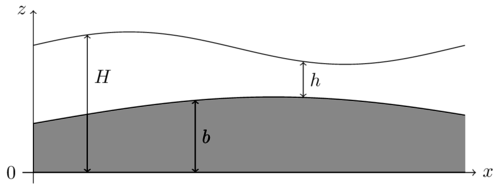

In [9]:
%%tikz -s 500,500 -sc 1.0 -f png
\fill[fill=gray!60] (0,0) -- plot [domain=0.0:8.0] (\x,{0.5*sin(20*\x+1)+0.9}) -- (8,0) -- cycle;
\draw[style=solid,->] (-0.2,0)--(8.2,0) node[right]{$x$};
\draw[style=solid] (8,0)--(-0.2,0) node[left]{$0$};
\draw[style=solid,->] (0,-0.2)--(0,3) node[left]{$z$};
\draw[smooth,samples=500,domain=0.0:8.0] plot(\x,{0.5*sin(20*\x+1)+0.9});
\draw[style=solid,<->] (3,0)--(3,1.3373) node[right,pos=0.5]{$b$};

\draw[smooth,samples=500,domain=0.0:8.0] plot(\x,{0.3*sin(45*\x+10)+2.3});
\draw[style=solid,<->] (5,1.3908)--(5,2.0453) node[right,pos=0.5]{$h$};

\draw[style=solid,<->] (1,0)--(1,2.5457) node[right,pos=0.7]{$H$};


##### Boundary Conditions

1. At the bottom ($z=b$):
    - No slip $\textbf v = \textbf 0$
    - No normal flow: 
        $$
            u \frac{\partial b}{\partial x} + v \frac{\partial b}{\partial y} + w = 0
        $$
    - Bottom shear stress
        $$\begin{aligned}
            \tau_{bx} &= \tau_{xx} \frac{\partial b}{\partial x} + \tau_{xy} \frac{\partial b}{\partial y} + \tau_{xz}\\
            \tau_{by} &= \tau_{yx} \frac{\partial b}{\partial x} + \tau_{yy} \frac{\partial b}{\partial y} + \tau_{yz}
        \end{aligned}$$
        where $\tau_{bx}, \tau_{by}$ is the bottom friction.
        
2. At the free surface ($z=H$):
    - No relative normal flow
        $$
            \frac{\partial h}{\partial t} + u \frac{\partial h}{\partial x} + v \frac{\partial h}{\partial y} - w = 0
        $$
    - p=0
    - Surface shear stress
         $$\begin{aligned}
            \tau_{sx} &= \tau_{xx} \frac{\partial b}{\partial x} + \tau_{xy} \frac{\partial b}{\partial y} + \tau_{xz}\\
            \tau_{sy} &= \tau_{yx} \frac{\partial b}{\partial x} + \tau_{yy} \frac{\partial b}{\partial y} + \tau_{yz}
        \end{aligned}$$

##### Depth-integration and averaging

We integrate the continuity equations over the fluid height $h(\textbf x, t)= H(\textbf x, t)-b(\textbf x)$ and assume **no slip boundary conditions** at the bottom boundary, i.e. $u=v=0$ for $z=b$.
Neglecting the vertical velocities yields

$$\begin{aligned}
 0 &= \int_{b(\textbf x)}^{H(\textbf x, t)}  \textbf u \cdot \nabla \ dz \\
  &= \frac{\partial}{\partial x} \int_{b(\textbf x)}^{H(\textbf x, t)}  u \ dz  - \left( u\vert_{z=H(\textbf x,t)} \frac{\partial h}{\partial x}\right)
  + \frac{\partial}{\partial y} \int_{b(\textbf x)}^{H(\textbf x, t)}  v \ dz - \left( v\vert_{z=H(\textbf x,t)} \frac{\partial h}{\partial y}\right)
\end{aligned}$$

Introducing the depth-averaged velocities $\overline{u}$ and $\overline{v}$:

$$\begin{aligned}
 \overline{u}(\textbf x, t)=\frac{1}{h(\textbf x, t)} \int_{b(\textbf x)}^{H(\textbf x, t)} u\ dz, \qquad \overline{v}(\textbf x, t)=\frac{1}{h(\textbf x, t)} \int_{b(\textbf x)}^{H(\textbf x, t)} v\ dz
\end{aligned}$$

and assuming **no relative normal flow**, i.e. $\frac{Dh}{Dt}=0 $ at $z=H$, yields the depth-averaged continuity equations

$$
  \frac{\partial h}{\partial t} + \frac{\partial (h\overline{u})}{dx}+  \frac{\partial (h\overline{v})}{dy}=0
$$

Now, the components of the momentum balances are

$$\begin{aligned}
\frac{\partial u}{\partial t} + \frac{\partial (u^2)}{\partial x} + \frac{\partial (u v)}{\partial y}+ \frac{\partial (u w)}{\partial z}&= - \frac{1}{\rho} \frac{\partial p}{\partial x} + \frac{\partial \overline{\textbf T}}{\partial x}+ \textbf b_1 \\
\frac{\partial v}{\partial t} + \frac{\partial (uv)}{\partial x} + \frac{\partial (v^2)}{\partial y}+\frac{\partial (v w)}{\partial z} &= - \frac{1}{\rho} \frac{\partial p}{\partial y} + \frac{\partial \overline{\textbf T}}{\partial y}+ \textbf b_2 \\
\frac{\partial w}{\partial t} + \frac{\partial (uw)}{\partial x} + \frac{\partial ( vw)}{\partial y}+\frac{\partial (w^2)}{\partial z} &= - \frac{1}{\rho} \frac{\partial p}{\partial z} + \frac{\partial \overline{\textbf T}}{\partial z}+ \textbf b_3
\end{aligned}$$

where $\textbf b$ contains the conservative body forces such as gravitational acceleration $g$ and Coriolis forcing $\textbf f_c$, which has a zero third entry, and $\boldsymbol\Phi$ contains all the stress terms.

##### A closer look on the third momentum equation:

If we assume small vertical velocities and the absence of stress terms in the vertical component, the third momentum equation is reduced to a hydrostatic pressure of the form

$$\begin{aligned}
 \frac{\partial p}{\partial z} = \rho g \quad \Rightarrow \quad p=\rho g (h+b-z),
\end{aligned}$$

which simplifies the pressure terms in the other two equations to

$$\begin{aligned}
 \frac{\partial p}{\partial x} = \rho g\frac{\partial(h+b)}{\partial x}, \qquad \frac{\partial p}{\partial y} = \rho g\frac{\partial(h+b)}{\partial y}
\end{aligned}$$

which is the hydrostatic pressure distribution, that we will assume throughout.
We integrate the x- and y-momentum equations over the fluid height, assume again that the vertical velocity is negligible, and obtain the depth-averaged momentum equations. 

We demonstrate this exemplarily for the x-momentum.

$$\begin{aligned}
\int_{b(\textbf x)}^{H(\textbf x, t)} \left( \frac{\partial u}{\partial t} + \frac{\partial (u^2)}{\partial x} + \frac{\partial (u v)}{\partial y} \right) dz
&= \int_{b(\textbf x)}^{H(\textbf x, t)} \left(-\frac{1}{\rho} \frac{\partial p}{\partial x} + \frac{\partial \overline{\textbf T}}{\partial x}+ \textbf b_1 \right) dz\\
&= \int_{b(\textbf x)}^{H(\textbf x, t)} \left( -g \frac{\partial(h+b)}{\partial x} + \frac{\partial \overline{\textbf T}}{\partial x} + \textbf b_1 \right) dz \\
\frac{\partial h\overline{u}}{\partial t} + \frac{\partial (h\overline{u}^2)}{\partial x} + \frac{\partial (h\overline{u} \overline{v})}{\partial y} &=
-gh \frac{\partial(h+b)}{\partial x}+ h\frac{\partial \overline{\textbf T}}{\partial x} + h \textbf b_1
\end{aligned}$$

where we have used the definition of the depth-integrated velocities. 

The corresponding equation for the y-momentum then takes the form

$$\begin{aligned}
 \frac{\partial h\overline{u}}{\partial t} + \frac{\partial (h\overline{u}\overline{v})}{\partial x} + \frac{\partial (h\overline{v}^2)}{\partial y} &=
-gh \frac{\partial(h+b)}{\partial y}+ h\frac{\partial \overline{\textbf T}}{\partial y} + h \textbf b_2
\end{aligned}$$


##### Source terms and storm surge modeling

Starting with the two-dimensional **shallow water equations**

$$\begin{aligned}
  \frac{\partial h}{\partial t} + \frac{\partial (h\overline{u})}{dx}+  \frac{\partial (h\overline{v})}{dy}&=0\\
\frac{\partial h\overline{u}}{\partial t} + \frac{\partial (h\overline{u}^2)}{\partial x} + \frac{\partial (h\overline{u} \overline{v})}{\partial y} &=
-gh \frac{\partial(h+b)}{\partial x}+ h\frac{\partial \overline{\textbf T}}{\partial x} + h \textbf b_1\\
 \frac{\partial h\overline{u}}{\partial t} + \frac{\partial (h\overline{u}\overline{v})}{\partial x} + \frac{\partial (h\overline{v}^2)}{\partial y} &=
-gh \frac{\partial(h+b)}{\partial y}+ h\frac{\partial \overline{\textbf T}}{\partial y} + h \textbf b_2
\end{aligned}$$

we identify the source terms that are important for storm surge modeling. 

Therefore, we will have a closer look at $\textbf b$ and $\overline{\textbf T}$.

$$\begin{aligned}
\rho \textbf b &= \rho \textbf g + \rho \textbf f_c\\
\nabla \cdot \overline{\textbf T} &= \boldsymbol \tau_s + \boldsymbol \tau_b
\end{aligned}$$

where $\textbf f_c = 2 \Omega_{rot} \sin(\psi_L) \cdot (h\overline u, h\overline v)^{\top}$ is the Coriolis forcing, $\Omega_{rot}$ the rotation rate of the Earth, and $\psi_L$ the latitude.

The stress terms are bottom friction $\boldsymbol \tau_b$ and wind stress $\boldsymbol \tau_s$. 
We assume the bottom friction to fulfill a quadratic Manning law:

$$
    \boldsymbol \tau_b  = g n_M^2 h\overline{\textbf u} \frac{\sqrt{\|\textbf u \|_2}}{h^{4/3}}
$$

where $n_M$ is the dimensionless Manning number.

Furthermore the wind stress is defined as

$$
    \boldsymbol \tau_s = \frac{\gamma_{\tau} \boldsymbol \tau}{h\rho}
$$

with $\boldsymbol \tau$ a prescribed wind field vector, and $\gamma_{\tau}\in\mathbb R$ a wind friction parameter.

##### Determination of the wind field

This part of the model depends on the scenario at hand. Basically one could use any two-dimensional wind field. 

As for storms, or hurricanes, we usually have information about the mean radius to maximum winds, central pressure, intensity and track of a storm, which are obtained from measurements and satellite observations, we use these data to obtain a two-dimensional vector field using a common approximation for the winds.

Holland's storm model can be utilized for modeling hurricane profiles as is shown in Holland, 1980, where analytical models are especially needed because observations are too sparse. Using cyclostrophic balances, one obtains winds $\textbf w$ via

$$\begin{aligned}
    C &= \frac{AB(p_n-p_c)}{\rho_{air}} , \quad
        \langle \textbf w , \textbf n \rangle = \sqrt{C \cdot \frac{\exp\left({\frac{-A}{r^B}}\right)}{r^B} + \frac{r^2 \ f^2}{4}} - \frac{r \ f }{2}
\end{aligned}$$

where $p_n$ is the ambient pressure, $p_c$ the central pressure, $A$ and $B$ are model-specific shape parameters, $r$ is the radius of the storm and $f$ the Coriolis forcing.

The vector $\textbf n$ is the outward pointing normal vector with respect to the isobars of the storm.
The air pressure $\rho_{air}=1.15$ is assumed to be constant.                                                                                                                                                          
If the Rossby number $Ro$ indicates that the Coriolis forcing is negligible, we will also neglect it in the equation for the wind, which simplifies the computations.

Following Weisberg et al., 2006 the wind field $\boldsymbol\tau_s$ is then given by

$$\begin{aligned}
    \boldsymbol\tau_s = C_d \ \rho_{air} \textbf w |\textbf w|
\end{aligned}$$

A suitable computation of wind drag $C_d$ is chosen as

$$\begin{aligned}
    1000.0 \cdot C_d = \begin{cases}  1.2 & |\boldsymbol\tau_s| \leq 11\\
                                      0.49 + 0.065 \cdot|\boldsymbol\tau_s|& 11 \le |\boldsymbol\tau_s| \leq 25 \\
                                      0.49 + 0.065 \cdot 25 & \mbox{otherwise.} \end{cases}
\end{aligned}$$

Details can be found in Weisberg et al., 2006. An example of the wind model result for hurricane Ike can be found in the figure shown below.

From the wind model we obtain a wind field at a certain time point.
The track of the cyclone is recorded at discrete time points $t_k$ with $\Delta t_{eye, k} = t_k-t_{k-1}$ for $k=1,\dots n$.
We denote the position of the cyclone at time $t$ with $\mbox{pos}_{eye}(t)$ and the position of the storm for intermediate time points $t_{k-1} \leq t_l \leq t_k$ will be linearly interpolated as follows:

$$\begin{aligned}
    \mbox{pos}_{eye}(t_l) = \frac{t_l-t_{k-1}}{\Delta t_{eye,k}}\left(\mbox{pos}_{eye}(t_k) - \mbox{pos}_{eye}(t_{k-1})\right) + \mbox{pos}_{eye}(t_{k-1}).
\end{aligned}$$

The discrete samples also make it possible to compute the velocity $\textbf v_{storm}$ of the storm itself using the great circle distance.

Let therefore $\psi_{L,k}, \theta_{L,k}$ be the latitude and longitude of the $k$th sample and $\Delta \psi_{L,k} = \psi_{L,k}-\psi_{L,k-1}$, $\Delta \theta_{L,k} = \theta_{L,k}-\theta_{L,k-1}$ their absolute differences. Then, the great circle distance is defined as

$$\begin{aligned}
    ds = r_{earth}\cdot 2  \arcsin\left( \sqrt{\sin^2(0.5\Delta\psi_{L,k})+ \cos(\theta_{L,k-1})\cos(\theta_{L,k}) \sin^2(0.5\Delta\theta_{L,k})} \right),
\end{aligned}$$

with $r_{earth}= 6371.0\ [km]$ the radius of the earth. The velocity at time $t$ with $t_{k-1} \leq t \leq t_k$ is then computed as

$$\begin{aligned}
 \textbf v_{storm}(t) = \frac{ds}{\Delta t_{eye,k}} \mbox{sign} \left(\mbox{pos}_{eye}(t_k)-\mbox{pos}_{eye}(t_{k-1})\right),
\end{aligned}$$

with $\mbox{sign}$ the component-wise signum function which returns the sign of its arguments.

![](./ike_holland_pressureprofile.png)
![](./ike_holland_windprofile.png)

The model-specific parameters $A$ and $B$ can be computed using the maximum wind speed $\textbf w_{max}$ and the maximum wind radius $r_{max}$:

$$\begin{aligned}
 B = e\ \rho_{air} \frac{\textbf w_{max}^2}{p_n-p_c}, \qquad  A = r_{max}^B.
\end{aligned}$$

